In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db

In [2]:
opsdb = db.OpsimDatabase('sqlite:///enigma_1189_sqlite.db')

In [3]:
propinfo, proptags = opsdb.fetchPropInfo()
reqvisits = opsdb.fetchRequestedNvisits(proptags['WFD'])
print reqvisits

{'g': 105, 'i': 240, 'r': 240, 'u': 75, 'y': 210, 'z': 210}


In [4]:
completeness_metric = metrics.CompletenessMetric(u=reqvisits['u'], g=reqvisits['g'], r=reqvisits['r'], 
                                          i=reqvisits['i'], z=reqvisits['z'], y=reqvisits['y'])
slicer = slicers.OpsimFieldSlicer()
summaryMetric = metrics.TableFractionMetric()
plotDict = {'xMin':0, 'xMax':1.2, 'colorMin':0, 'colorMax':1.2}

In [5]:
completeness = metricBundles.MetricBundle(metric=completeness_metric, slicer=slicer, 
                                          sqlconstraint='', runName='enigma_1189', 
                                         summaryMetrics=summaryMetric, plotDict=plotDict)

In [6]:
bdict = {'completeness':completeness}

In [7]:
bg = metricBundles.MetricBundleGroup(bdict, opsdb)

In [8]:
bg.runAll()

Querying database with constraint 
Found 2469307 visits
Running:  ['completeness']
Completed


In [9]:
bg.reduceAll()

Optimal bin calculation tried to make 400 bins, returning 200
Optimal bin calculation tried to make 201 bins, returning 200
Metric data type not float or int. No plots generated.
Optimal bin calculation tried to make 301 bins, returning 200
Optimal bin calculation tried to make 1209 bins, returning 200
Optimal bin calculation tried to make 301 bins, returning 200
Optimal bin calculation tried to make 342 bins, returning 200


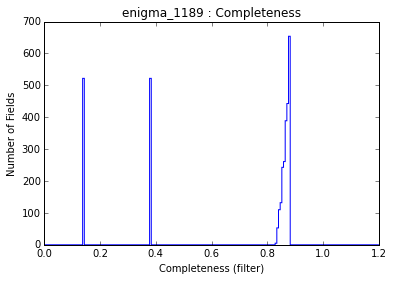

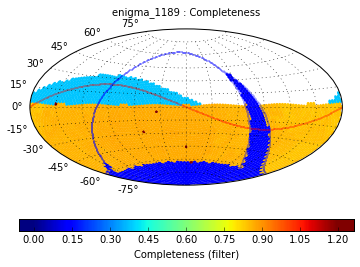

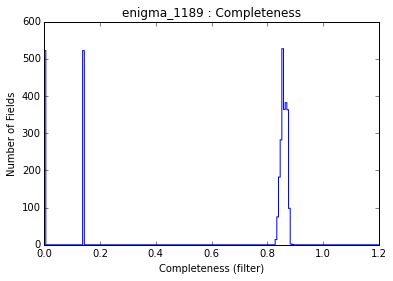

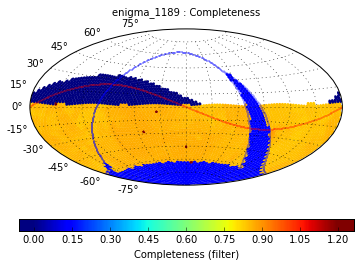

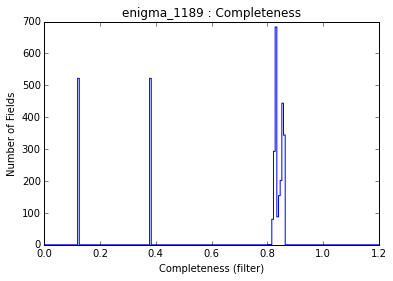

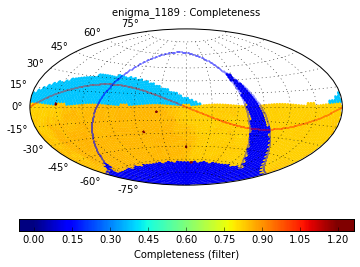

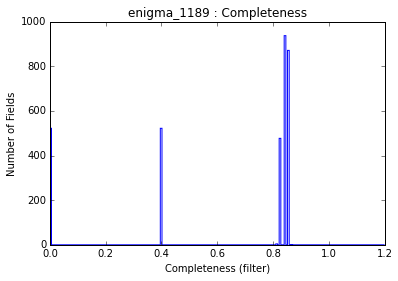

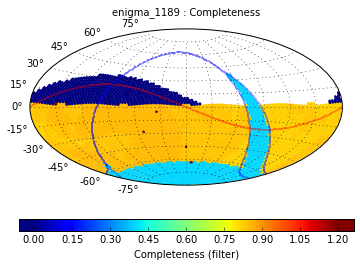

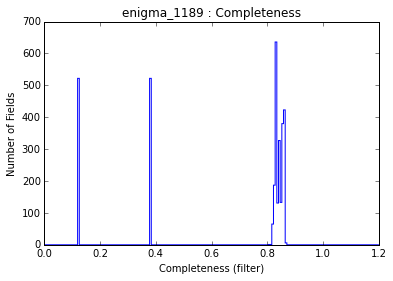

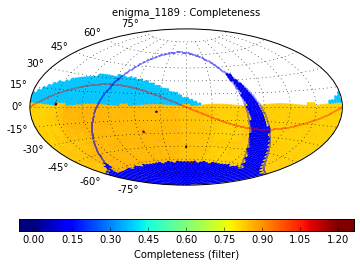

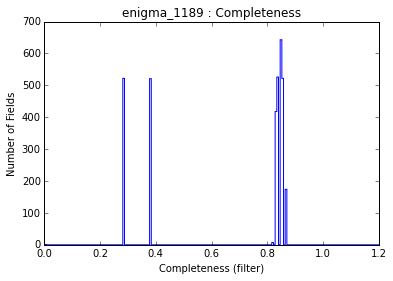

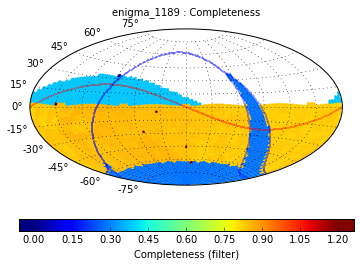

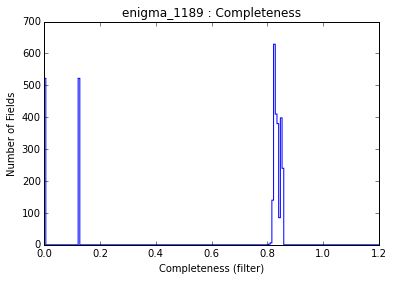

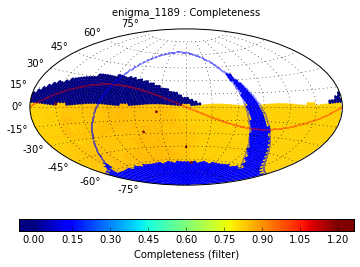

In [12]:
bg.plotAll()

In [10]:
bg.summaryAll()

In [11]:
for b in bdict.itervalues():
    print b.metric.name, b.summaryValues

Completeness_z [['TableFraction', array([('0 == P', 3.0), ('0 < P < 0.1', 0.0), ('0.1 <= P < 0.2', 522.0),
       ('0.2 <= P < 0.3', 0.0), ('0.3 <= P < 0.4', 522.0),
       ('0.4 <= P < 0.5', 0.0), ('0.5 <= P < 0.6', 0.0),
       ('0.6 <= P < 0.7', 0.0), ('0.7 <= P < 0.8', 0.0),
       ('0.8 <= P < 0.9', 2290.0), ('0.9 <= P < 1', 0.0), ('1 == P', 0.0),
       ('1 < P', 5.0)], 
      dtype=[('name', 'S20'), ('value', '<f8')])]]
Completeness_y [['TableFraction', array([('0 == P', 525.0), ('0 < P < 0.1', 0.0), ('0.1 <= P < 0.2', 522.0),
       ('0.2 <= P < 0.3', 0.0), ('0.3 <= P < 0.4', 0.0),
       ('0.4 <= P < 0.5', 0.0), ('0.5 <= P < 0.6', 0.0),
       ('0.6 <= P < 0.7', 0.0), ('0.7 <= P < 0.8', 0.0),
       ('0.8 <= P < 0.9', 2290.0), ('0.9 <= P < 1', 0.0), ('1 == P', 0.0),
       ('1 < P', 5.0)], 
      dtype=[('name', 'S20'), ('value', '<f8')])]]
Completeness []
Completeness_r [['TableFraction', array([('0 == P', 3.0), ('0 < P < 0.1', 0.0), ('0.1 <= P < 0.2', 522.0),
       ('0.2 <=